In [1]:
import os
from pip import main
import sys; sys.path.insert(0, '/cs/usr/nomoriel/PycharmProjects/trajectory_reconstruction_tradeoff')
import glob
import argparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import trajectory_reconstruction_tradeoff as T
import random
import scanpy as sc
import altair as alt
from altair_saver import save

random.seed(20)

/cs/usr/nomoriel/miniconda3/envs/traj/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
# trajectory params
dirname = '/cs/labs/mornitzan/nomoriel/trajectory_reconstruction_tradeoff/'
datadir = os.path.join(dirname, 'datasets')
# outdir = os.path.join(dirname, 'output_new2' ) 
dataset = 'linear_rep0' 
sample = 'reads'# 'tradeoff' #'cells' 
repeats = 20
    
desc = 'testing new l1 error'
# load trajectory
X, D, meta = T.io.read_dataset(dataset, datadir)
traj = T.tr.Trajectory(X, meta=meta)

In [3]:
# sampling
print(f'Sampling by {sample}')
if sample == 'cells':
    Bs = [-1]
    Pc = Pvar = np.round(0.01 * 2 ** np.arange(0, 6.7, 0.34), 3) # np.round(0.03 * 2 ** np.arange(0, 5, 0.3), 2)
    Pt = Pconst = np.ones_like(Pvar)

if sample == 'reads':
    Bs = [-1]
    # Pt = Pvar = 10 ** np.arange(-6, -0.5, 0.25)
    Pt = Pvar = 10 ** np.arange(-4, -0.5, 0.5) # TEMP
    Pc = Pconst = np.ones_like(Pvar)

if sample == 'tradeoff':
    Bs = 10 ** np.linspace(-5, -1, 10)
    Pc = Pvar = np.arange(0.01, 0.9, 0.01)
    # coarse
    Bs = 10 ** np.linspace(-4, -2, 3) # TEMP
    Pc = Pvar = np.arange(0.01, 0.9, 0.03) # TEMP

    Pt = None

Sampling by reads


In [4]:
L_per_traj = []
for B in Bs:
    print(B)
    L_per_traj.append(traj.compute_tradeoff(B=B, Pc=Pc, Pt=Pt, repeats=repeats, comp_deltas=True))
L = pd.concat(L_per_traj)

L['trajectory type'] = dataset

-1
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.
Samples collapse.


In [8]:
L[L['pt'] <  0.0005]['l3']

0      400023.533139
1           2.788715
7      311571.523676
8           2.681081
14     575761.977095
15          2.713043
21     659906.791274
22          2.654932
28     538535.709470
29          2.866774
35     425764.478223
36          2.561347
42     383953.205042
43          2.685855
49     472641.542490
50          2.676001
56     430004.369642
57          2.871531
63     203809.453151
64          2.921723
70     530286.073581
71          2.733747
77     557048.753900
78          2.910013
84     379234.364112
85          2.706005
91     354856.558067
92        335.115241
98     292802.113891
99          2.767796
105    399218.182993
106         2.698521
112    388027.180641
113         2.700731
119    236589.518470
120         2.666612
126    548257.359588
127         2.792318
133    410715.534039
134         2.754269
Name: l3, dtype: float64

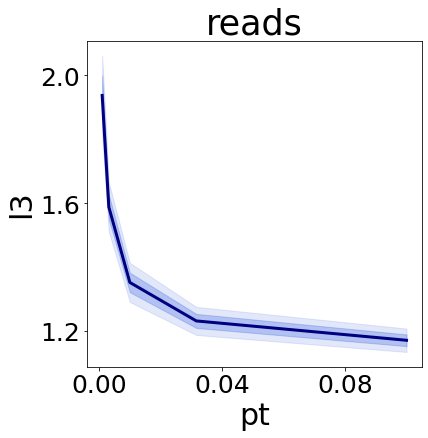

In [7]:
L_reads = L.copy()
d = 2
fig,ax = plt.subplots(1,1, figsize=(6,6))
L_reads['pt inv'] = 1 / L_reads['pt']
L_reads['pt inv pow'] = 1 / L_reads['pt']**(1/d)
xcol = 'pt'#'pt inv pow' #'log pt'
ycol = 'l3'
T.pl.plot_tradeoff(L_reads[L_reads['pt'] >  0.0005], xcol=xcol, ycol=ycol, xlabel=xcol, ylabel=ycol, ax=ax, title=sample)

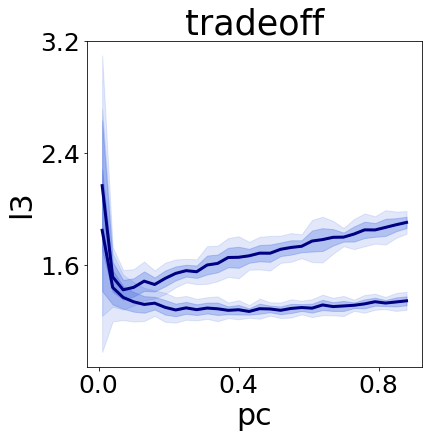

In [37]:
# L_tradeoff = L.copy()
fig,ax = plt.subplots(1,1, figsize=(6,6))
xcol = 'pc'
ycol = 'l3'
sample='tradeoff'
T.pl.plot_tradeoff(L_tradeoff[L_tradeoff['B'] == 0.001], xcol=xcol, ycol=ycol, xlabel=xcol, ylabel=ycol, ax=ax)
T.pl.plot_tradeoff(L_tradeoff[L_tradeoff['B'] == 0.01], xcol=xcol, ycol=ycol, xlabel=xcol, ylabel=ycol, ax=ax, title=sample)



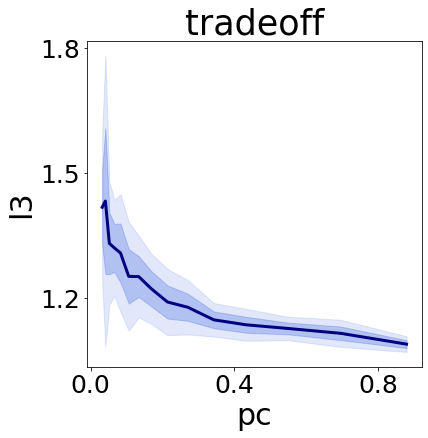

In [43]:
# L_cells = L.copy()
L_cells['pc inv'] = 1 / L_cells['pc']
L_cells['pc inv pow'] = 1 / L_cells['pc']**(1/d)
xcol = 'pc'#'pc inv pow' #'log pt'

# xcol = 'log pc'
ycol = 'l3'
T.pl.plot_tradeoff(L_cells[L_cells['pc']> 0.03], xcol=xcol, ycol=ycol, xlabel=xcol, ylabel=ycol, title=sample)